# Boston House Prices

https://www.kaggle.com/vikrishnan/boston-house-prices?select=housing.csv

Each record in the database describes a Boston suburb or town. The attributes are deﬁned as follows:
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to ﬁve Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000
- PTRATIO: pupil-teacher ratio by town 
- B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in 1000s

### Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Housing.csv', header=None, prefix="var")
dataset.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
dataset.shape

(506, 15)

In [4]:
# Split into input and output values
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

In [5]:
X

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Feature Scaling

In [7]:
# In ANN neuron wights get multiplied with input, so it is necessary to scale the inputs to a common scale.
# Also it helps in easier multiplication as I/Ps are scaled down
# It also helps in back propogation as derivatives can be easily found with smaller values.
# As a result, convergence will happen quickly.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


### Artificial Neural Network

I have defined a simple model with two hidden layers and an output layer that predicts a numeric value. I will use the ReLU activation function and “he” weight initialization, which are a good practice.

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [9]:
features = X_train.shape[1]
model = Sequential()
model.add(Dense(20, kernel_initializer='he_normal', activation='relu', input_dim=features))
model.add(Dense(5, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(1))

In [10]:
# Compile the model and specify loss and optimizer
opt = Adam(learning_rate=0.01, beta_1=0.85, beta_2=0.999)
model.compile(optimizer=opt, loss='mse')

In [11]:
# Fit the model on the training dataset
model_history=model.fit(X_train, y_train,validation_split=0.30, epochs=250, batch_size=10)

Epoch 1/250
25/25 [==============================] - 1s 17ms/step - loss: 637.0800 - val_loss: 444.6252
Epoch 2/250
25/25 [==============================] - 0s 3ms/step - loss: 362.6816 - val_loss: 71.7220
Epoch 3/250
25/25 [==============================] - 0s 2ms/step - loss: 54.3828 - val_loss: 34.0767
Epoch 4/250
25/25 [==============================] - 0s 3ms/step - loss: 28.4038 - val_loss: 25.8543
Epoch 5/250
25/25 [==============================] - 0s 3ms/step - loss: 30.1765 - val_loss: 22.5965
Epoch 6/250
25/25 [==============================] - 0s 3ms/step - loss: 13.7853 - val_loss: 21.1756
Epoch 7/250
25/25 [==============================] - 0s 3ms/step - loss: 15.8190 - val_loss: 18.6369
Epoch 8/250
25/25 [==============================] - 0s 3ms/step - loss: 13.5980 - val_loss: 18.5499
Epoch 9/250
25/25 [==============================] - 0s 3ms/step - loss: 11.3641 - val_loss: 17.2484
Epoch 10/250
25/25 [==============================] - 0s 3ms/step - loss: 12.3517 - val

25/25 [==============================] - 0s 3ms/step - loss: 5.1340 - val_loss: 11.0355
Epoch 83/250
25/25 [==============================] - 0s 2ms/step - loss: 3.6333 - val_loss: 9.2785
Epoch 84/250
25/25 [==============================] - 0s 2ms/step - loss: 4.3909 - val_loss: 9.4130
Epoch 85/250
25/25 [==============================] - 0s 3ms/step - loss: 4.1891 - val_loss: 9.4156
Epoch 86/250
25/25 [==============================] - 0s 2ms/step - loss: 3.6075 - val_loss: 10.2818
Epoch 87/250
25/25 [==============================] - 0s 2ms/step - loss: 3.7460 - val_loss: 10.8921
Epoch 88/250
25/25 [==============================] - 0s 3ms/step - loss: 4.5057 - val_loss: 10.4754
Epoch 89/250
25/25 [==============================] - 0s 2ms/step - loss: 4.6929 - val_loss: 8.7119
Epoch 90/250
25/25 [==============================] - 0s 2ms/step - loss: 5.7408 - val_loss: 9.7666
Epoch 91/250
25/25 [==============================] - 0s 2ms/step - loss: 4.1315 - val_loss: 10.2386
Epoch 92

Epoch 163/250
25/25 [==============================] - 0s 3ms/step - loss: 2.6139 - val_loss: 14.1345
Epoch 164/250
25/25 [==============================] - 0s 2ms/step - loss: 3.4432 - val_loss: 10.0259
Epoch 165/250
25/25 [==============================] - 0s 2ms/step - loss: 2.9752 - val_loss: 13.4262
Epoch 166/250
25/25 [==============================] - 0s 2ms/step - loss: 4.2802 - val_loss: 8.9548
Epoch 167/250
25/25 [==============================] - 0s 2ms/step - loss: 3.3604 - val_loss: 10.8905
Epoch 168/250
25/25 [==============================] - 0s 2ms/step - loss: 2.8909 - val_loss: 10.0318
Epoch 169/250
25/25 [==============================] - 0s 2ms/step - loss: 3.9234 - val_loss: 10.0334
Epoch 170/250
25/25 [==============================] - 0s 2ms/step - loss: 4.4332 - val_loss: 13.8704
Epoch 171/250
25/25 [==============================] - 0s 3ms/step - loss: 3.6322 - val_loss: 11.8573
Epoch 172/250
25/25 [==============================] - 0s 2ms/step - loss: 3.8329 -

25/25 [==============================] - 0s 2ms/step - loss: 3.1438 - val_loss: 13.7401
Epoch 244/250
25/25 [==============================] - 0s 2ms/step - loss: 2.8546 - val_loss: 11.9522
Epoch 245/250
25/25 [==============================] - 0s 2ms/step - loss: 2.2703 - val_loss: 11.1508
Epoch 246/250
25/25 [==============================] - 0s 3ms/step - loss: 3.1285 - val_loss: 10.7392
Epoch 247/250
25/25 [==============================] - 0s 2ms/step - loss: 2.8856 - val_loss: 12.2335
Epoch 248/250
25/25 [==============================] - 0s 2ms/step - loss: 2.4145 - val_loss: 14.2903
Epoch 249/250
25/25 [==============================] - 0s 2ms/step - loss: 3.0942 - val_loss: 13.0248
Epoch 250/250
25/25 [==============================] - 0s 2ms/step - loss: 2.6618 - val_loss: 11.0630


In [12]:
print(model_history.history.keys())

dict_keys(['loss', 'val_loss'])


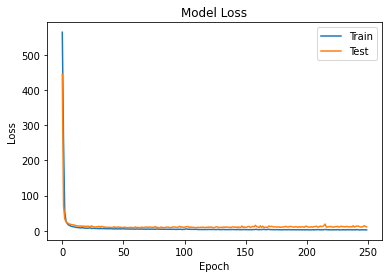

In [13]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [15]:
# Calculate the average error in the predictions
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae)

MAE: 2.971
